# <font color='dodgerblue'> Performance given condition across the stimulation protocol
***
    
###  We are testing the prediction that silencing CG (either during choice or sample) will decrease NpHR rats' performance. 
###  We will analyze the total performance (all data combined into one "artificial" session) and performance across days (each session is treated as an individual datapoint).
***   
    

## <font color='firebrick'>Imports
***

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import scipy.stats as stats
from performance_calculations_optogenetics import organize_folder_directories_and_get_performance_data
from plot_pooled_performance import plot_pooled_performance
from numpy import median

%matplotlib inline

## <font color='firebrick'>Inputs
***

In [20]:
main_path = 'E:\PERFORMANCE_LOGS'
conditions_to_plot = [-1, 0, 1, 3]

## <font color='mediumseagreen'> Collect the performance data from the performance logs
***

In [21]:
ctrl_data, nphr_data = organize_folder_directories_and_get_performance_data(
    main_path, conditions_to_plot
)

<re.Match object; span=(25, 38), match='DENGOSO_CTRL2'>
<re.Match object; span=(25, 37), match='MESTRE_CTRL1'>
<re.Match object; span=(25, 37), match='BRIOSA_CTRL3'>
<re.Match object; span=(25, 36), match='ROCKY_CTRL6'>
<re.Match object; span=(25, 36), match='DUNGA_NPHR2'>
<re.Match object; span=(25, 36), match='FELIZ_NPHR1'>
<re.Match object; span=(25, 38), match='HEFESTO_NPHR4'>
<re.Match object; span=(25, 37), match='SONECA_NPHR3'>
<re.Match object; span=(25, 39), match='HERCULES_NPHR6'>
<re.Match object; span=(25, 35), match='ZEUS_NPHR5'>
<re.Match object; span=(25, 36), match='RAMBO_NPHR7'>
<re.Match object; span=(25, 35), match='ARES_NPHR8'>


In [22]:
# Inspect the control group dataframe
nphr_data.head(10)

,stim,perf,ratcode
0,-1,0.75,DUNGA_NPHR2
1,-1,0.90,DUNGA_NPHR2
2,0,0.80,DUNGA_NPHR2
3,1,0.80,DUNGA_NPHR2
4,3,0.40,DUNGA_NPHR2
5,0,1.00,DUNGA_NPHR2
6,1,0.80,DUNGA_NPHR2
7,3,0.80,DUNGA_NPHR2
8,0,0.80,DUNGA_NPHR2
9,1,0.80,DUNGA_NPHR2


In [23]:
# Inspect number of rats per DataFrame. Compare the output with the number of expected rats.
print(ctrl_data['ratcode'].unique(), nphr_data['ratcode'].unique())

['DENGOSO_CTRL2' 'MESTRE_CTRL1' 'BRIOSA_CTRL3' 'ROCKY_CTRL6'] ['DUNGA_NPHR2' 'FELIZ_NPHR1' 'HEFESTO_NPHR4' 'SONECA_NPHR3'
 'HERCULES_NPHR6' 'ZEUS_NPHR5' 'RAMBO_NPHR7' 'ARES_NPHR8']


## <font color='mediumseagreen'> Rearrange the DataFrames
***

In [24]:
# Multiply performance by 100 to change from scale 0-1 to scale 0-100 (%)
nphr_data['perf'] = nphr_data['perf']*100
ctrl_data['perf'] = ctrl_data['perf']*100

In [25]:
# Remove data from NpHR#3 - Unilateral stiulated animal (1 fiber stub implanted)
nphr_data = nphr_data[nphr_data['ratcode'] != "SONECA_NPHR3"]

# Group the data by rat and stimulation condition. Calculate the mean performance for each
nphr_pooled_performance = nphr_data.groupby(['ratcode','stim'])['perf'].mean().reset_index()
ctrl_pooled_performance = ctrl_data.groupby(['ratcode', 'stim'])['perf'].mean().reset_index()

## <font color='mediumseagreen'> Concatenate all data into one DataFrame
***

In [26]:
# Labell animals as 'control' or 'nphr' before combining data
ctrl_pooled_performance['group'] = 'control'
nphr_pooled_performance['group'] = 'nphr'

In [27]:
# Concatenate data from the control and experimental group into a single dataframe
all_pooled_performance = pd.concat([ctrl_pooled_performance, nphr_pooled_performance])
all_pooled_performance

,ratcode,stim,perf,group
0,BRIOSA_CTRL3,-1,78.582375,control
1,BRIOSA_CTRL3,0,83.851852,control
2,BRIOSA_CTRL3,1,80.296296,control
3,BRIOSA_CTRL3,3,71.851852,control
4,DENGOSO_CTRL2,-1,78.333333,control
5,DENGOSO_CTRL2,0,81.202083,control
6,DENGOSO_CTRL2,3,82.026633,control
7,MESTRE_CTRL1,-1,82.500000,control
8,MESTRE_CTRL1,0,80.000000,control
9,MESTRE_CTRL1,1,62.872024,control


# 1
***
### <font color='mediumseagreen'>Total performance analysis across all stimulation conditions, both groups (NpHR+ and NpHR-)
***

In [28]:
# Change stim type from 3 to 1 so the data points regarding 3 can be set on x=2
all_pooled_performance['stim'] = all_pooled_performance['stim'].mask(all_pooled_performance['stim'] == 3, 2)
all_pooled_performance['stim'].unique()

array([-1,  0,  1,  2], dtype=int64)

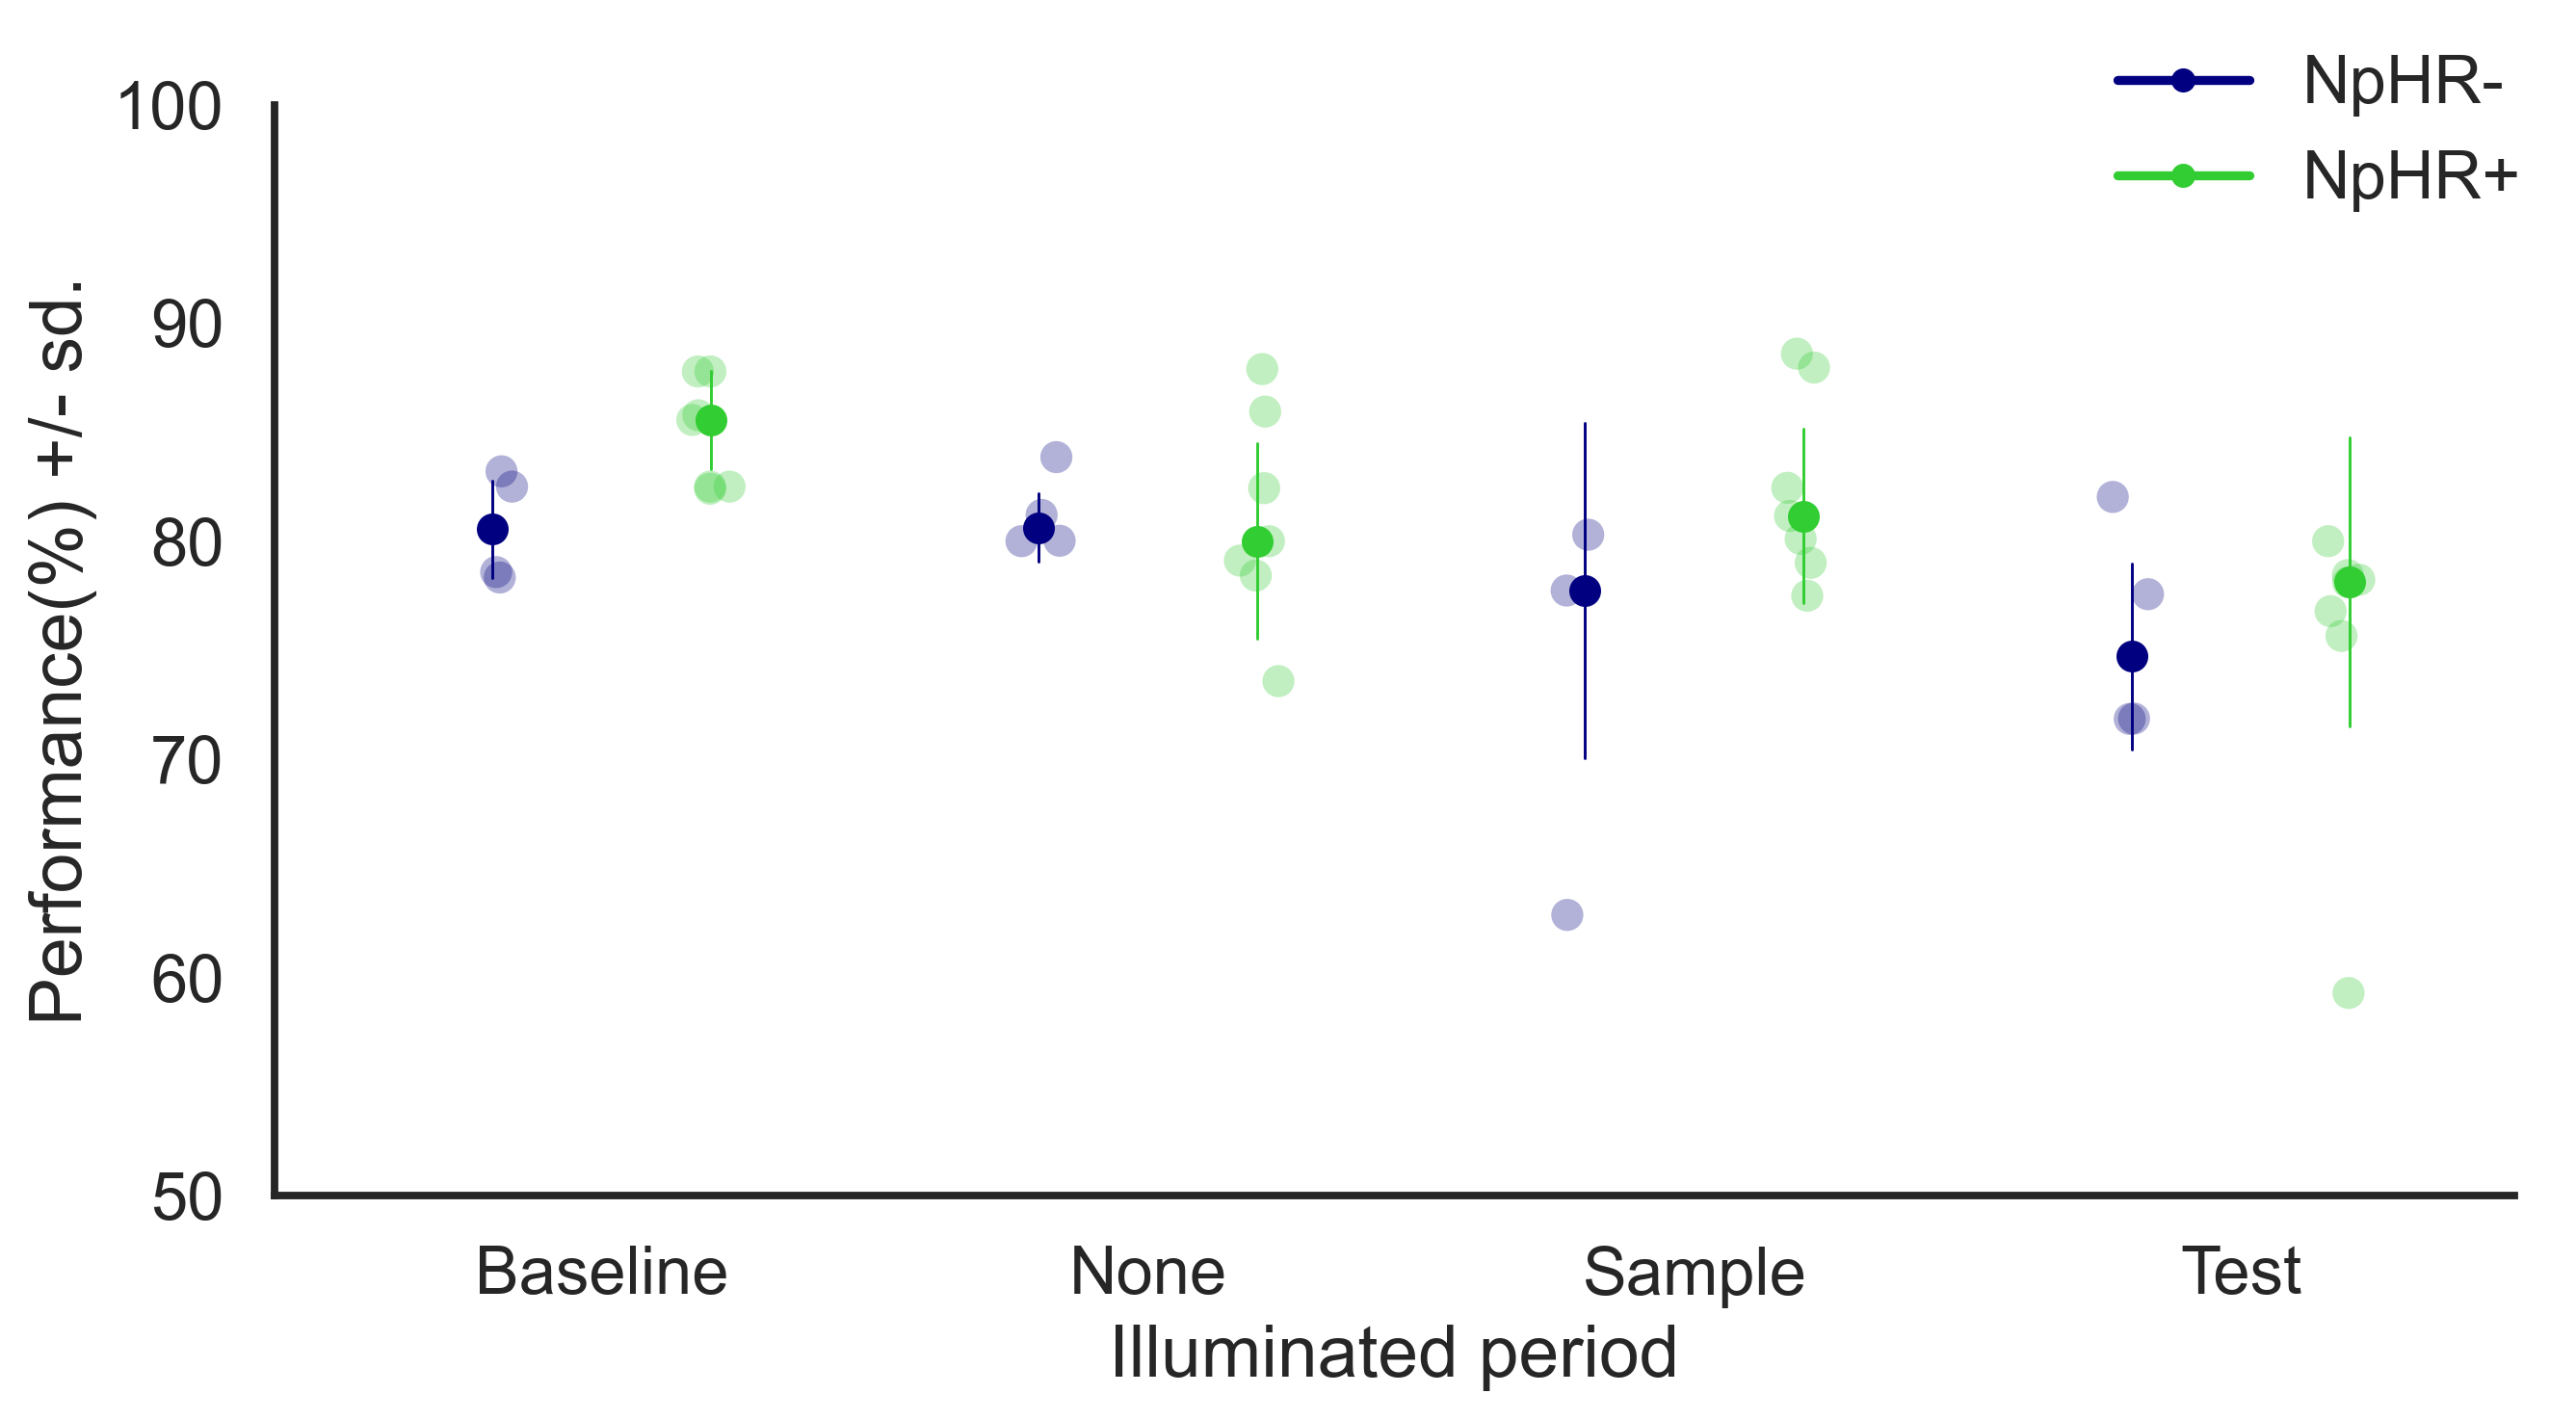

In [29]:
sns.set(style="white", context='talk')    
plt.figure(figsize=(10,5),dpi=300)

g = sns.stripplot(
    x='stim', y='perf', hue='group',
    data=all_pooled_performance,
    dodge=2, jitter=.08,
    alpha=.3, s=8,
    palette=['navy', 'limegreen']
)

# Show median
sns.pointplot(
    x='stim', y='perf', hue='group',
    data=all_pooled_performance, 
    estimator=median,
    dodge=.4, 
    join=False,            
    markers="o", scale=.6, linewidth=1,
    ci="sd",
    errwidth=.7,
    palette=['navy', 'limegreen']
)

g.set(
    ylabel='Performance(%) +/- sd.', xlabel='Illuminated period',
    ylim=(50, 100), xlim=(-0.6, 3.5)
)

g.set_xticklabels(labels=['Baseline', 'None', 'Sample', 'Test'], rotation=0)

# ------------------------------------- LEGEND -------------------------------------------- 
g.legend_.remove()

control_line = mlines.Line2D([], [], color='navy', marker='o', markersize=5, label='NpHR-')
nphr_line = mlines.Line2D([], [], color='limegreen', marker='o', markersize=5, label='NpHR+')
plt.legend(handles=[control_line, nphr_line], frameon=False, loc='upper right', bbox_to_anchor=(1.03, 1.1))

sns.despine()
plt.show()

# 2.
***
### <font color='mediumseagreen'> Total performance in the pre-stimulation vs. test-stimulation trials
***

In [13]:
nphr = all_pooled_performance[all_pooled_performance['group'] == 'nphr']

# Create a mask to remove pre stimulation data
#mask = all_pooled_performance['stim']> -1
#all_pooled_performance = all_pooled_performance[mask]
all_pooled_performance['stim'].unique()

array([-1,  0,  1,  2], dtype=int64)

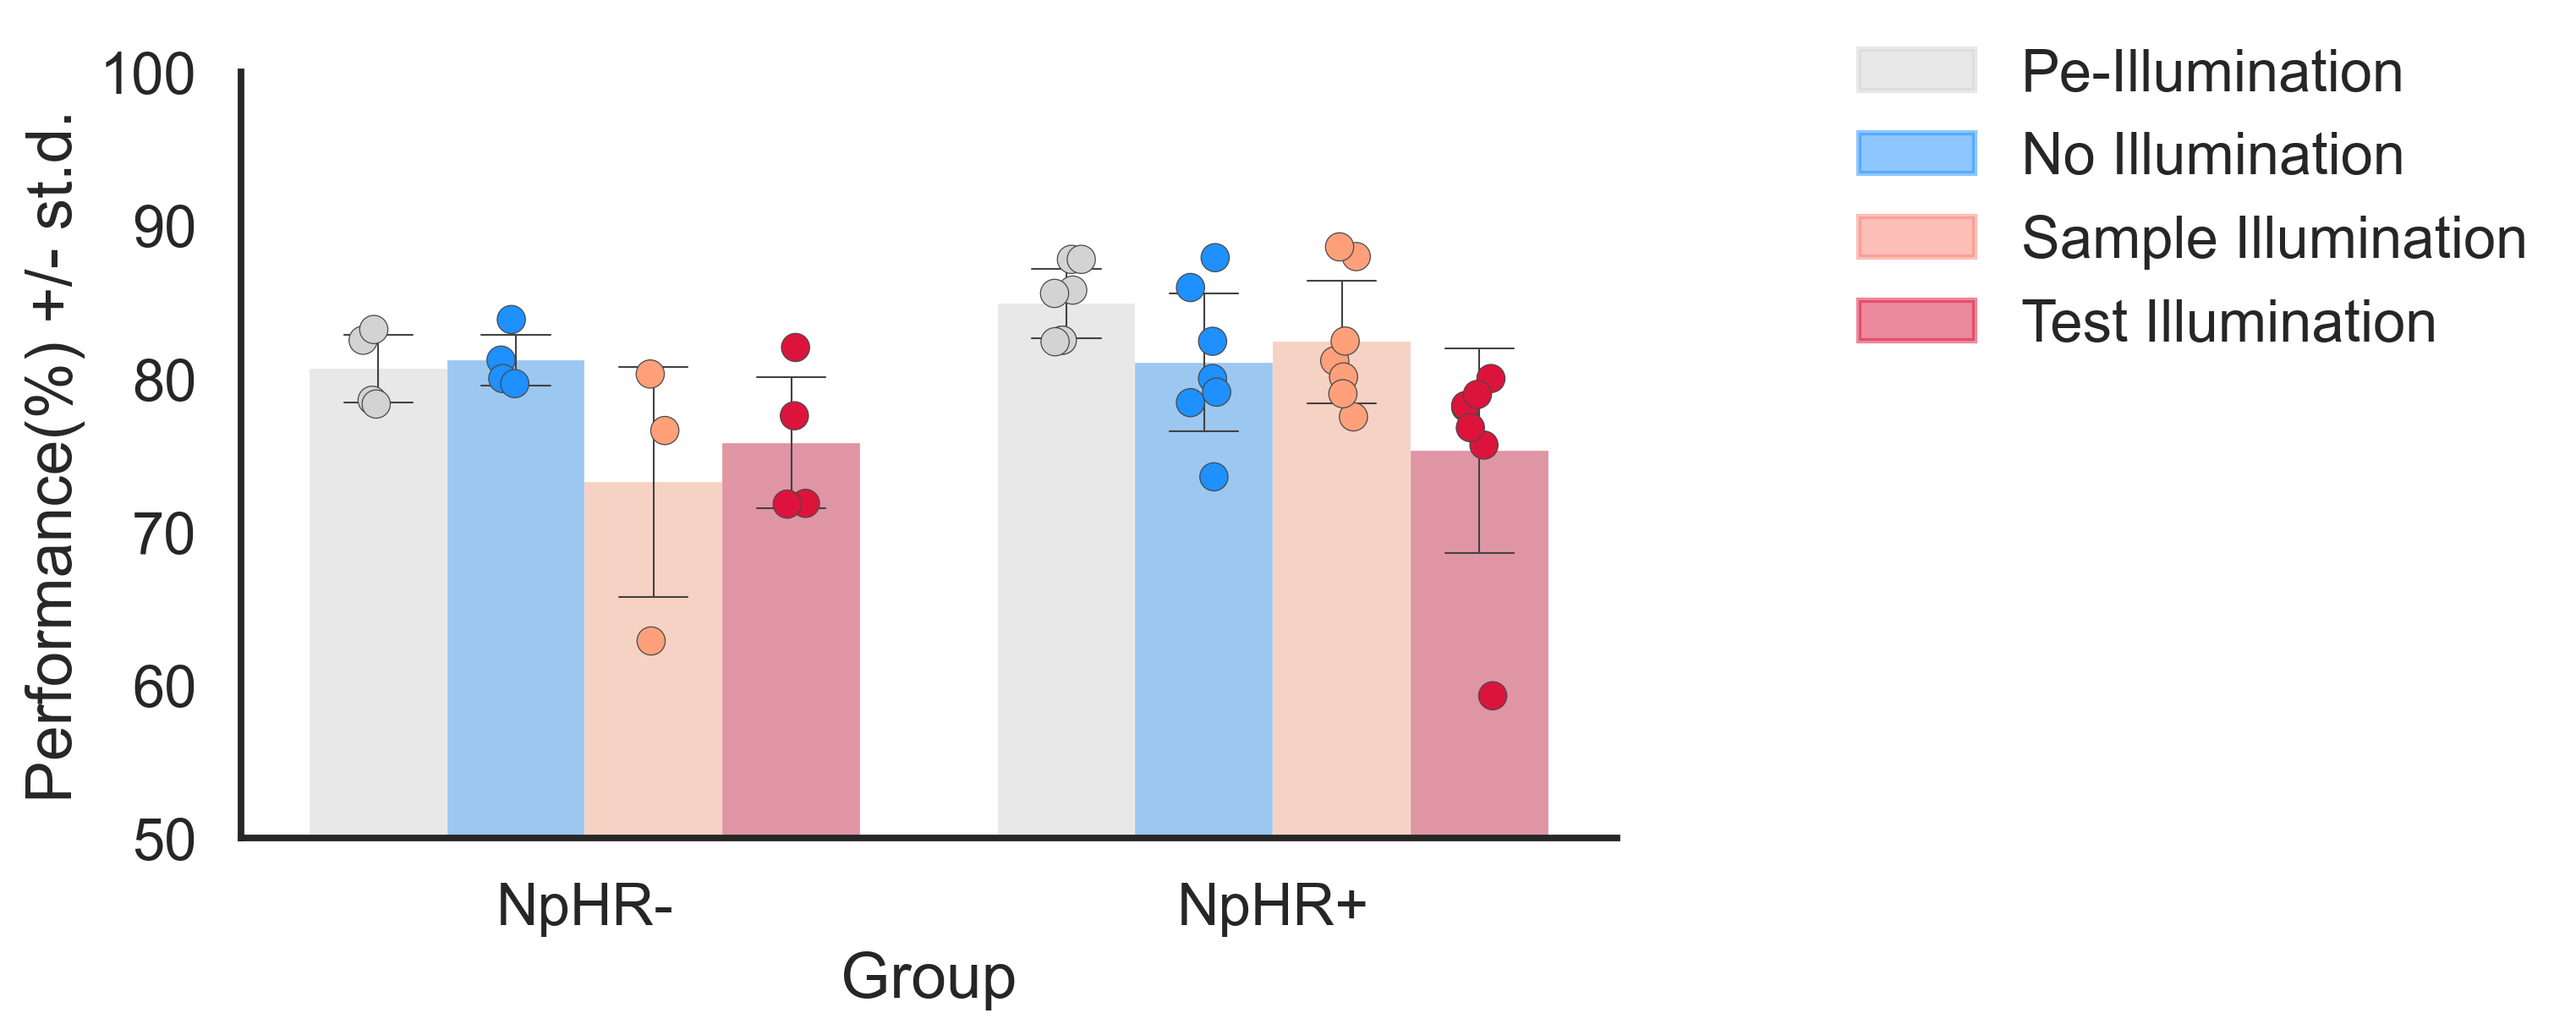

In [15]:
sns.set(style="white", context='talk')
plt.figure(figsize=(7,4), dpi=300)

sns.stripplot(
    x='group', y='perf', hue='stim',data=all_pooled_performance,
    dodge=.5, jitter=.09, alpha=1, s=8,palette=['lightgray','dodgerblue', 'lightsalmon', 'crimson'],
    linewidth=.3
)
# Show means
a = sns.barplot(
   x='group', y='perf', hue='stim', data=all_pooled_performance,            
   ci="sd", errwidth=.5, capsize=.1, alpha=.5, palette=['lightgray','dodgerblue','lightsalmon','crimson'],
   linewidth=.1
)

a.set(
    ylabel='Performance(%) +/- st.d.', xlabel='Group',
    ylim=(50, 100), xlim=(-.5, 1.5)
)

a.set_xticklabels(labels=['NpHR-', 'NpHR+'], rotation=0)

a.legend_.remove()
pre_patch = mpatches.Patch(color='lightgray', label='Pre-Illumination', alpha=.5)
no_patch = mpatches.Patch(color='dodgerblue', label='No Illumination', alpha=.5)
sample_patch = mpatches.Patch(color='salmon', label='Sample Illumination', alpha=.5)
test_patch = mpatches.Patch(color='crimson', label='Test Illumination', alpha=.5)
plt.legend(handles=[pre_patch, no_patch, sample_patch, test_patch], frameon=False, loc='upper right', bbox_to_anchor=(1.7, 1.1))

sns.despine()
plt.show()


### Performance given timeouts - new notebook
### Characterization of errors - new notebook